 #  Transfer learning model- VGG16 and VGG19 (2014) (Intel Scene Multi-Class Image Classification)


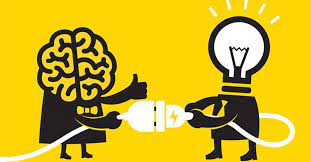

Identifying natural scenes from all around the world is an interesting computer vision problem. In this challenge, we are going to classify six different category Imges.This dataset contains about ~25k images from a wide range of natural scenes from all around the world. The task is to identify which kind of scene can the image be categorized into.

It is a 6 class problem

- Buildings
-Forests
-Mountains
- Glacier
- Street
- Sea


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d puneet6060/intel-image-classification

 98% 339M/346M [00:01<00:00, 195MB/s]
100% 346M/346M [00:01<00:00, 209MB/s]


## Given data is in Zip format. So first we have to unzip the files

In [4]:
!unzip "/content/intel-image-classification.zip"

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

## Import the libraries:

In [5]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator,load_img
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, AveragePooling2D, Flatten, Dropout
from keras.preprocessing.image import load_img
import warnings
warnings.filterwarnings("ignore")

##Visualize some Random Images from Training set

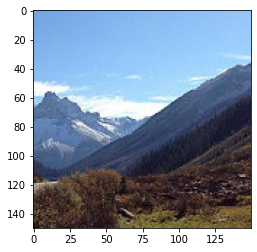

In [6]:
image = load_img("/content/seg_train/seg_train/mountain/10008.jpg")
plt.imshow(image)

## Transforms for image -augmentations


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Add data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,horizontal_flip=True,shear_range=0.2,  
    zoom_range=0.2, validation_split=0.2)

train_generator=train_datagen.flow_from_directory(
      '/content/seg_train/seg_train',
      target_size=(150,150),
      batch_size=64,
      class_mode='sparse',
      seed=2209,
      subset='training'
    
)

validation_generator=train_datagen.flow_from_directory(
      '/content/seg_train/seg_train',
      target_size=(150,150),
      batch_size=64,
      class_mode='sparse',
      seed=2209,
      subset='validation'
    
)

test_datagen = ImageDataGenerator(rescale = 1./255.)
test_generator = test_datagen.flow_from_directory(
    "/content/seg_test/seg_test", 
    target_size=(150,150),
    batch_size=32,
    class_mode='sparse',
    seed=2209
) 


Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [8]:
train_generator.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

## Generator work

In [9]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

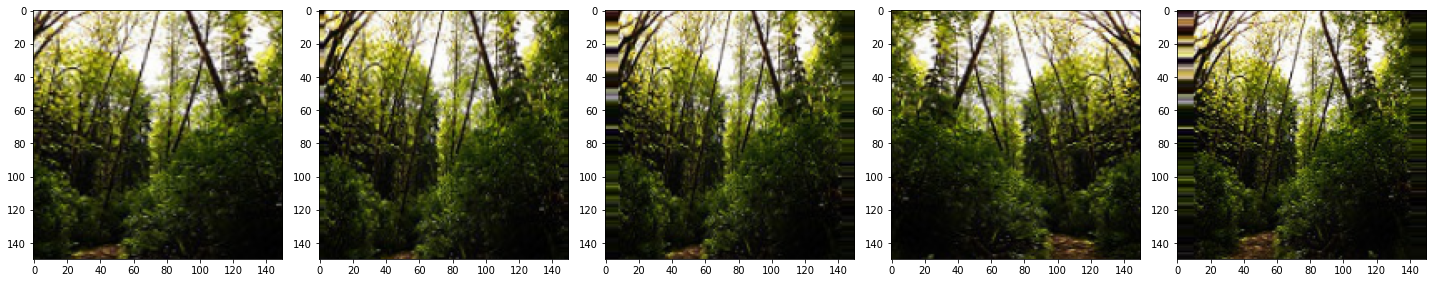

In [10]:
images = [train_generator[0][0][0] for i in range(5)]
plotImages(images)

## Vgg 16

VGGNet is a Convolutional Neural Network architecture proposed by Karen Simonyan and Andrew Zisserman from the University of Oxford in 2014. 
This paper mainly focuses on the effect of the convolutional neural network depth on its accuracy.
 You can find the original paper of VGGNet which is titled [Very Deep Convolutional Networks for Large Scale Image Recognition.](https://arxiv.org/abs/1409.1556)

## Key Features of Vgg 16
- It is also called the OxfordNet model, named after the Visual Geometry Group from Oxford.
- Number 16 refers that it has a total of 16 layers that has some weights.
- It Only has Conv and pooling layers in it.
- always use a 3 x 3 Kernel for convolution.
- 2x2 size of the max pool.
- has a total of about 138 million parameters.
- Trained on ImageNet data
- It has an accuracy of 92.7%.
- it has one more version of it Vgg 19, a total of 19 layers with weights.

## The architecture of Vgg 16

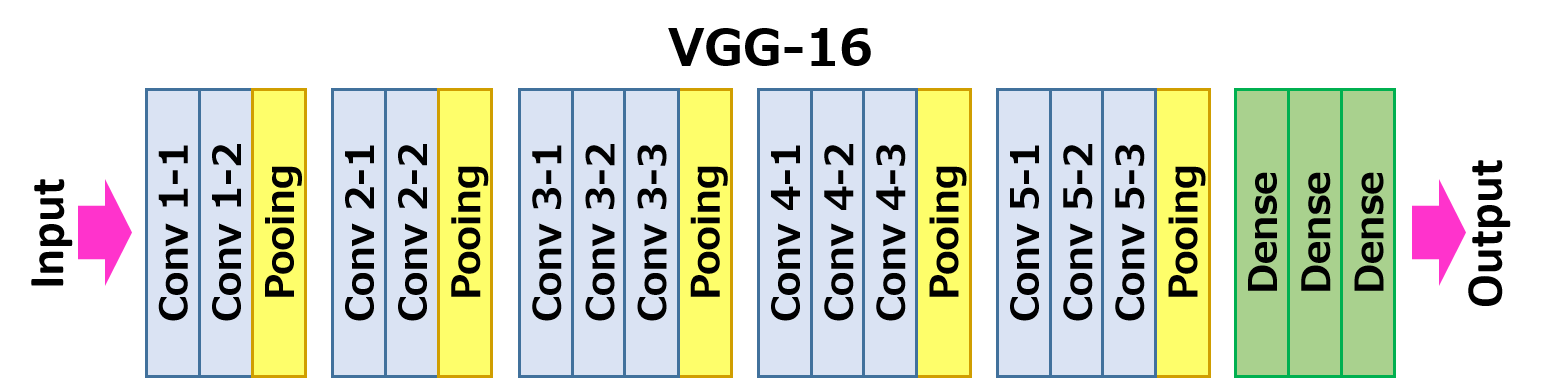


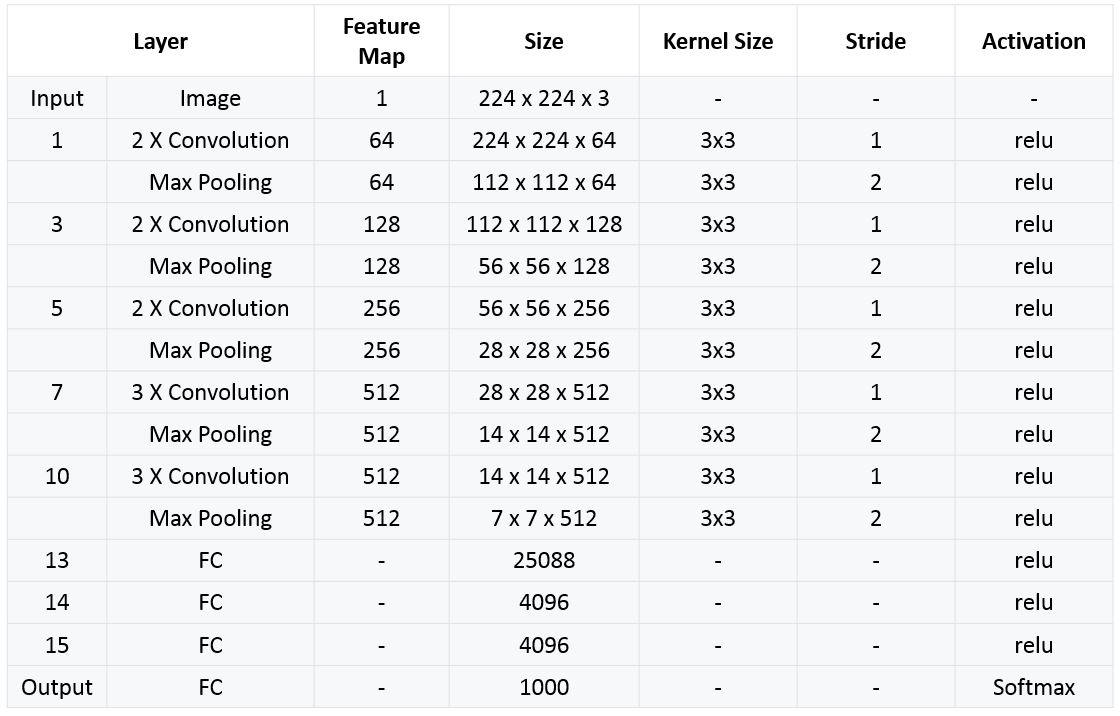

In [11]:
model = Sequential()

In [12]:
#The first part has two conv64 with a pooling layer
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


#The second part has two conv128 with a pooling layer
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))



#The Third part has three conv256 with a pooling layer
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))



#The fourth part has four conv512 with a pooling layer
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


#The fifth part has four conv512 with a pooling layer
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

#At last, We have Two Dense layers with 4096 nodes and an output layer
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=6, activation="softmax")) 

## Practical Usecase of VGG16

In [13]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [14]:
vgg_16 = VGG16( weights = 'imagenet',include_top = False,input_shape = (150,150,3))
vgg_16.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [15]:
for layer in vgg_16.layers:
  layer.trainable = False

In [16]:
model_vgg_16 = Sequential()
model_vgg_16.add(vgg_16)
model_vgg_16.add(Flatten())
model_vgg_16.add(Dense(250, activation='relu'))
model_vgg_16.add(Dropout(0.5))
model_vgg_16.add(Dense(6, activation='softmax'))

## Fit Model

In [17]:
model_vgg_16.compile(loss='sparse_categorical_crossentropy',  optimizer='adam',  metrics=['accuracy'])

In [18]:
BATCH_SIZE=64
EPOCHS=50

In [19]:
history = model_vgg_16.fit_generator(
                                train_generator,
                                steps_per_epoch = train_generator.samples // BATCH_SIZE,
                                epochs = EPOCHS,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.samples // BATCH_SIZE,
                             )

Epoch 1/50
175/175 [==============================] - 118s 405ms/step - loss: 0.8761 - accuracy: 0.6784 - val_loss: 0.4062 - val_accuracy: 0.8467
Epoch 2/50
175/175 [==============================] - 72s 399ms/step - loss: 0.4559 - accuracy: 0.8376 - val_loss: 0.3733 - val_accuracy: 0.8597
Epoch 3/50
175/175 [==============================] - 70s 399ms/step - loss: 0.4168 - accuracy: 0.8469 - val_loss: 0.3447 - val_accuracy: 0.8757
Epoch 4/50
175/175 [==============================] - 69s 399ms/step - loss: 0.3765 - accuracy: 0.8625 - val_loss: 0.3593 - val_accuracy: 0.8743
Epoch 5/50
175/175 [==============================] - 70s 400ms/step - loss: 0.3909 - accuracy: 0.8569 - val_loss: 0.3681 - val_accuracy: 0.8670
Epoch 6/50
175/175 [==============================] - 69s 398ms/step - loss: 0.3680 - accuracy: 0.8592 - val_loss: 0.3487 - val_accuracy: 0.8768
Epoch 7/50
175/175 [==============================] - 69s 399ms/step - loss: 0.3338 - accuracy: 0.8790 - val_loss: 0.3491 - val_a

## Save Model

In [21]:
model_vgg_16.save('model_vgg_6.h5')

## Virtualize Training

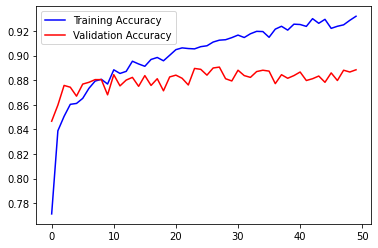

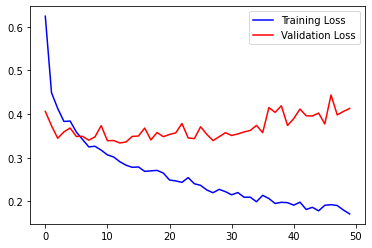

In [22]:
%matplotlib inline
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(50) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.legend()
plt.show()

# Prepare Evaluate Generator for Model

In [23]:
accuracy=model_vgg_16.evaluate_generator(test_generator, steps=len(test_generator)//32,verbose=2)
print('Accuracy of the model on the test set: ',accuracy[1])

2/2 - 3s - loss: 0.1974 - accuracy: 0.9219
Accuracy of the model on the test set:  0.921875


# Test Model performance on custom data:

In [24]:
import numpy as np
from tensorflow.keras.preprocessing import image

def pred(path):
  test_image = image.load_img(path, target_size = (150,150))
  plt.imshow(test_image)
  test_image=np.expand_dims(test_image,axis=0)
  test_image=np.array(test_image)
  test_image=test_image/255
  prediction =np.argmax(model_vgg_16.predict(test_image),axis=1)
  result={0: 'buildings',1: 'forest', 2: 'glacier', 3: 'mountain', 4: 'sea', 5: 'street'}
  return print(result[prediction[0]])

forest


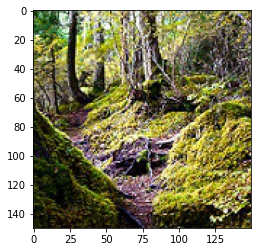

In [25]:
pred('/content/seg_pred/seg_pred/10021.jpg')

street


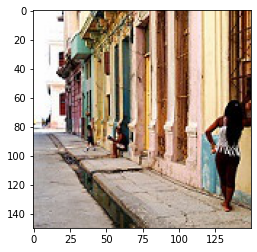

In [26]:
pred('/content/seg_pred/seg_pred/10045.jpg')

# VGG19

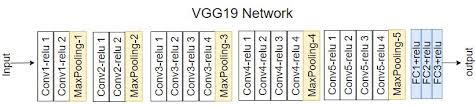

In [27]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input

In [28]:
vgg_19 = VGG16( weights = 'imagenet',include_top = False,input_shape = (150,150,3))
vgg_19.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [29]:
model_vgg_19 = Sequential()
model_vgg_19.add(vgg_19)
model_vgg_19.add(Flatten())
model_vgg_19.add(Dense(250, activation='relu'))
model_vgg_19.add(Dropout(0.5))
model_vgg_19.add(Dense(6, activation='softmax'))

In [30]:
model_vgg_19.compile(loss='sparse_categorical_crossentropy',  optimizer='adam',  metrics=['accuracy'])

In [31]:
history1 = model_vgg_19.fit_generator(
                                train_generator,
                                steps_per_epoch = train_generator.samples // BATCH_SIZE,
                                epochs = EPOCHS,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.samples // BATCH_SIZE,
                             )

Epoch 1/50
175/175 [==============================] - 95s 504ms/step - loss: 1.8446 - accuracy: 0.2466 - val_loss: 1.1265 - val_accuracy: 0.5461
Epoch 2/50
175/175 [==============================] - 86s 490ms/step - loss: 1.0537 - accuracy: 0.5840 - val_loss: 0.8735 - val_accuracy: 0.6453
Epoch 3/50
175/175 [==============================] - 86s 491ms/step - loss: 0.8426 - accuracy: 0.6831 - val_loss: 0.5955 - val_accuracy: 0.7878
Epoch 4/50
175/175 [==============================] - 86s 492ms/step - loss: 0.6917 - accuracy: 0.7547 - val_loss: 0.6731 - val_accuracy: 0.7406
Epoch 5/50
175/175 [==============================] - 86s 494ms/step - loss: 0.6452 - accuracy: 0.7676 - val_loss: 0.6328 - val_accuracy: 0.7762
Epoch 6/50
175/175 [==============================] - 87s 497ms/step - loss: 0.6554 - accuracy: 0.7673 - val_loss: 0.6716 - val_accuracy: 0.7522
Epoch 7/50
175/175 [==============================] - 87s 497ms/step - loss: 0.5942 - accuracy: 0.7929 - val_loss: 0.5387 - val_ac

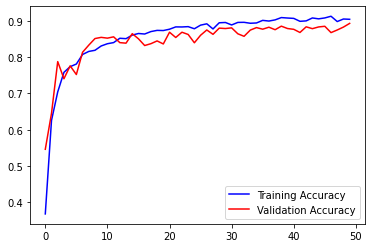

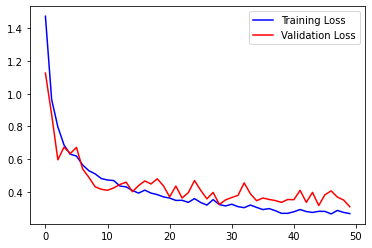

In [32]:
%matplotlib inline
acc=history1.history['accuracy']
val_acc=history1.history['val_accuracy']
loss=history1.history['loss']
val_loss=history1.history['val_loss']

epochs=range(50) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.legend()
plt.show()

In [42]:
accuracy=model_vgg_19.evaluate_generator(test_generator, steps=len(test_generator)//32,verbose=2)
print('Accuracy of the model on the test set:{} %'.format(round(accuracy[1]*100)))

2/2 - 0s - loss: 0.3097 - accuracy: 0.9062
Accuracy of the model on the test set:91 %
